<img width='600px' src='./legendary1.png'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./data/raw_train.csv')
test = pd.read_csv('./data/raw_test.csv')
train.shape, test.shape

((520, 9), (281, 8))

In [3]:
brk = train.shape[0]
comb = pd.concat([train, test], axis=0, sort=False, ignore_index=True)
comb.shape

(801, 9)

In [4]:
comb.iloc[brk-2:brk+2,:]

,rowid,unique_id,types,abilities,base_happiness,height_m,weight_kg,poke_stats,is_legendary
518,519,69,"normal, nan","['Own Tempo', 'Tangled Feet', 'Contrary']",70,1.1,5,"60, nan, 60.0, 60.0, 60.0, 60.0",0.0
519,520,461,"dragon, flying","['Inner Focus', 'Multiscale']",35,2.2,210,"nan, 134.0, 95.0, 100.0, 100.0, 80.0",0.0
520,1,602,"grass, nan","['Overgrow', 'Contrary']",70.0,0.6,8.1,"nan, nan, 55.0, 45.0, nan, 63.0",NaN
521,2,756,"fairy, flying","['Hustle', 'Serene Grace', 'Super Luck']",70.0,1.5,38.0,"nan, nan, 95.0, 120.0, 115.0, 80.0",NaN


In [5]:
comb.drop(columns=['rowid'], inplace=True)

In [6]:
comb.sample(10)

,unique_id,types,abilities,base_happiness,height_m,weight_kg,poke_stats,is_legendary
168,2,"rock, bug","['Battle Armor', 'Swift Swim']",NaN,0.7,12.5,"nan, 95.0, 50.0, 40.0, nan, 75.0",0.0
109,458,"psychic, nan",['Prism Armor'],0,2.4,230,"nan, nan, 101.0, 127.0, nan, 79.0",1.0
500,285,"normal, dark","['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",70,NaN,NaN,"nan, 71.0, 70.0, 40.0, 80.0, 77.0",0.0
134,633,"grass, poison","['Chlorophyll', 'Gluttony']",70,1,6.4,"nan, 90.0, nan, 85.0, 45.0, 55.0",0.0
293,119,"rock, water","['Tough Claws', 'Sniper', 'Pickpocket']",70,0.5,31,"42, nan, 67.0, 39.0, 56.0, 50.0",0.0
550,394,"water, nan","['Swift Swim', 'Water Veil', 'Lightningrod']",70.0,0.6,15.0,"nan, 67.0, 60.0, 35.0, 50.0, 63.0",NaN
47,130,"bug, poison","['Shield Dust', 'Run Away']",70,0.3,3.2,"nan, 35.0, nan, 20.0, 20.0, 50.0",0.0
488,793,"fire, water",['Water Absorb'],100,1.7,195,"nan, 110.0, 120.0, 130.0, 90.0, 70.0",1.0
609,593,"grass, fighting","['Overgrow', 'Bulletproof']",70.0,1.6,90.0,"nan, nan, 122.0, nan, 75.0, 64.0",NaN
38,236,"psychic, grass",['Natural Cure'],100,0.6,5,"nan, nan, 100.0, 100.0, nan, 100.0",1.0


# Feature extraction

## Types

In [7]:
unique_type_comb = list(comb['types'].unique())
unique_types = set()
for type_set in unique_type_comb:
    for t in type_set.split():
        unique_types.add(t.replace(',',''))

In [8]:
unique_types

{'bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'nan',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water'}

In [9]:
for t in unique_types:
    comb['type_'+t] = comb['types'].apply(lambda x: 1 if t in x else 0)
comb.drop(columns=['types', 'type_nan'], inplace=True)

## Abilities

In [10]:
unique_abilities_comb = list(comb['abilities'].unique())
unique_abilities = set()
for abil_set in unique_abilities_comb:
    abils = abil_set.replace('[', '').replace(']', '').replace("'", '')
#     print(abils)
    for t in abils.split(','):
#         print(t.strip())
#         unique_abilities.add(t.strip().replace(' ', '_'))
        unique_abilities.add(t.strip())

In [11]:
len(unique_abilities)

227

In [12]:
unique_abilities

{'Adaptability',
 'Aftermath',
 'Air Lock',
 'Analytic',
 'Anger Point',
 'Anticipation',
 'Arena Trap',
 'Aroma Veil',
 'Aura Break',
 'Bad Dreams',
 'Battery',
 'Battle Armor',
 'Battle Bond',
 'Beast Boost',
 'Berserk',
 'Big Pecks',
 'Blaze',
 'Bulletproof',
 'Cheek Pouch',
 'Chlorophyll',
 'Clear Body',
 'Cloud Nine',
 'Color Change',
 'Comatose',
 'Competitive',
 'Compoundeyes',
 'Contrary',
 'Corrosion',
 'Cursed Body',
 'Cute Charm',
 'Damp',
 'Dancer',
 'Dark Aura',
 'Dazzling',
 'Defeatist',
 'Defiant',
 'Disguise',
 'Download',
 'Drizzle',
 'Drought',
 'Dry Skin',
 'Early Bird',
 'Effect Spore',
 'Electric Surge',
 'Emergency Exit',
 'Fairy Aura',
 'Filter',
 'Flame Body',
 'Flare Boost',
 'Flash Fire',
 'Flower Gift',
 'Flower Veil',
 'Fluffy',
 'Forecast',
 'Forewarn',
 'Friend Guard',
 'Frisk',
 'Full Metal Body',
 'Fur Coat',
 'Gale Wings',
 'Galvanize',
 'Gluttony',
 'Gooey',
 'Grass Pelt',
 'Grassy Surge',
 'Guts',
 'Harvest',
 'Healer',
 'Heatproof',
 'Heavy Metal',
 

In [13]:
for t in unique_abilities:
    comb['abil_'+t.replace(' ', '_')] = comb['abilities'].apply(lambda x: 1 if t in x else 0)
comb.drop(columns=['abilities'], inplace=True)

In [14]:
comb.head(5)

,unique_id,base_happiness,height_m,weight_kg,poke_stats,is_legendary,type_grass,type_steel,type_rock,type_fighting,...,abil_Speed_Boost,abil_Water_Compaction,abil_Strong_Jaw,abil_Prism_Armor,abil_Forewarn,abil_Long_Reach,abil_Oblivious,abil_Gluttony,abil_Drizzle,abil_Psychic_Surge
0,665,70,0.6,12.5,"nan, 80.0, 55.0, 25.0, 35.0, 35.0",0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,288,70,0.6,29.7,"nan, nan, 65.0, 45.0, 45.0, 45.0",0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,349,70,1.2,22.2,"nan, 64.0, 60.0, 111.0, 60.0, 117.0",0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,260,70,0.4,6.5,"nan, 50.0, 95.0, 40.0, 50.0, 35.0",0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,536,70,0.6,9.5,"nan, 65.0, 64.0, 44.0, 48.0, 43.0",0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Stats

In [15]:
def stat_extrator(stat: str, ix: int):
    s = stat.split(',')
    return s[ix]

In [16]:
for stat_n in range(0, 6, 1):
    col_name = 'stat_'+str(stat_n+1)
    comb[col_name] = comb['poke_stats'].apply(lambda x: stat_extrator(x, stat_n)).astype(float)
    comb[col_name].fillna(0, inplace=True)
#     print(stat_n)

comb.drop(columns=['poke_stats'], inplace=True)

In [17]:
comb.head(5)

,unique_id,base_happiness,height_m,weight_kg,is_legendary,type_grass,type_steel,type_rock,type_fighting,type_flying,...,abil_Oblivious,abil_Gluttony,abil_Drizzle,abil_Psychic_Surge,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
0,665,70,0.6,12.5,0.0,0,0,0,1,0,...,0,0,0,0,0.0,80.0,55.0,25.0,35.0,35.0
1,288,70,0.6,29.7,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,65.0,45.0,45.0,45.0
2,349,70,1.2,22.2,0.0,0,0,0,0,0,...,1,0,0,0,0.0,64.0,60.0,111.0,60.0,117.0
3,260,70,0.4,6.5,0.0,0,0,0,0,0,...,0,0,0,0,0.0,50.0,95.0,40.0,50.0,35.0
4,536,70,0.6,9.5,0.0,0,0,0,0,0,...,0,0,0,0,0.0,65.0,64.0,44.0,48.0,43.0


# Other missing data

In [18]:
def summary_missing_data(df: pd.DataFrame, lowest_proportion: float = 0.0) -> pd.DataFrame:
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Count', 'Percent'])
    return missing_data[missing_data['Percent'] > lowest_proportion]

In [19]:
summary_missing_data(comb)

,Count,Percent
is_legendary,281,0.350811
base_happiness,83,0.103620
height_m,20,0.024969
weight_kg,19,0.023720


### Base_happiness

<img src='./base_happ_info.png'>
<img src='./base_happ_info2.png'>

### Base happiness doesn't seem to be relevant for a pokemon to be legendary or not

In [20]:
comb.drop(columns=['base_happiness'], inplace=True)

In [21]:
# comb['base_happiness'].unique()

In [22]:
# comb[comb['base_happiness'] == 'michael was here']

In [23]:
# comb.at[619, 'base_happiness'] = np.nan

In [24]:
# comb['base_happiness'] = comb['base_happiness'].astype(float);

In [25]:
# See frequency of happiness grouped by legendary/normal pokemons
# comb[ comb['is_legendary'] == 1.0 ]['base_happiness'].hist(label='Legenday')
# comb[ comb['is_legendary'] == 0.0 ]['base_happiness'].hist(label='Normal')
# plt.legend();

In [26]:
# Get NULL happiness who are legendary
# comb[ (comb['base_happiness'].isna()) & (comb['is_legendary']==1.0)]

In [27]:
# Get NULL happiness from the test set
# comb[ (comb['base_happiness'].isna()) & (comb['is_legendary'].isna())]

In [28]:
summary_missing_data(comb)

,Count,Percent
is_legendary,281,0.350811
height_m,20,0.024969
weight_kg,19,0.023720


## Height

In [30]:
# comb['height_m'] = comb['height_m'].astype(float)

In [31]:
comb[ comb['height_m'].isna() ]

,unique_id,height_m,weight_kg,is_legendary,type_grass,type_steel,type_rock,type_fighting,type_flying,type_normal,...,abil_Oblivious,abil_Gluttony,abil_Drizzle,abil_Psychic_Surge,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
25,246,NaN,NaN,0.0,0,0,1,0,0,0,...,0,0,0,0,0.0,0.0,130.0,55.0,0.0,45.0
36,71,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,75.0,90.0,10.0,35.0,40.0
63,450,NaN,NaN,0.0,0,0,0,0,0,0,...,0,1,0,0,0.0,105.0,75.0,65.0,0.0,50.0
66,470,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,100.0,60.0,50.0,70.0,110.0
86,456,NaN,NaN,0.0,0,0,0,0,0,1,...,0,0,0,0,65.0,60.0,60.0,0.0,65.0,115.0
90,100,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,85.0,50.0,95.0,85.0,110.0
210,220,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,75.0,81.0,0.0,109.0
221,481,NaN,NaN,0.0,0,0,1,0,0,0,...,0,0,0,0,0.0,115.0,75.0,55.0,75.0,82.0
232,398,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,30.0,35.0,45.0,90.0
274,638,NaN,NaN,0.0,0,0,0,0,0,0,...,0,1,0,0,0.0,80.0,50.0,40.0,50.0,25.0


In [32]:
comb['height_m'].unique()

array([0.6, 1.2, 0.4, 3.2, 1.1, 1.3, 0.5, 1.4, 2.1, 0.7, 0.2, 2.0, 2.3,
       3.5, nan, 1.7, 2.5, 1.8, 1.9, 0.9, 1.5, 0.3, 3.8, 1.0, 4.5, 0.8,
       0.1, 3.9, 2.4, 1.6, 5.8, 3.0, 2.2, 4.0, 5.4, 8.8, 5.2, 3.4, 3.3,
       6.5, 4.2, 3.7, 14.5, '0.6', '1.5', '1.4', '0.2', '1.3', '0.8',
       '1.9', '0.4', '1.0', '1.2', '1.6', '0.9', '0.3', '1.7', '9.2',
       '0.5', '0.7', '2.7', '2.8', '2.0', '1.8', '5.5', '1.1', '2.6',
       '0.1', '2.4', '2.3', ' ', '5.0', '2.5', '2.2', '3.5', '6.2', '2.1',
       '2.9', '3.0', '7.0'], dtype=object)

In [33]:
comb[ comb['height_m']==' ' ]

,unique_id,height_m,weight_kg,is_legendary,type_grass,type_steel,type_rock,type_fighting,type_flying,type_normal,...,abil_Oblivious,abil_Gluttony,abil_Drizzle,abil_Psychic_Surge,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
647,221,,71.0,NaN,1,0,0,0,0,0,...,0,0,0,0,0.0,110.0,76.0,65.0,82.0,56.0


In [34]:
comb.at[647, 'height_m'] = np.nan

In [35]:
comb['height_m'].unique()

array([0.6, 1.2, 0.4, 3.2, 1.1, 1.3, 0.5, 1.4, 2.1, 0.7, 0.2, 2.0, 2.3,
       3.5, nan, 1.7, 2.5, 1.8, 1.9, 0.9, 1.5, 0.3, 3.8, 1.0, 4.5, 0.8,
       0.1, 3.9, 2.4, 1.6, 5.8, 3.0, 2.2, 4.0, 5.4, 8.8, 5.2, 3.4, 3.3,
       6.5, 4.2, 3.7, 14.5, '0.6', '1.5', '1.4', '0.2', '1.3', '0.8',
       '1.9', '0.4', '1.0', '1.2', '1.6', '0.9', '0.3', '1.7', '9.2',
       '0.5', '0.7', '2.7', '2.8', '2.0', '1.8', '5.5', '1.1', '2.6',
       '0.1', '2.4', '2.3', '5.0', '2.5', '2.2', '3.5', '6.2', '2.1',
       '2.9', '3.0', '7.0'], dtype=object)

In [36]:
comb['height_m'] = comb['height_m'].astype(float)

In [37]:
comb.groupby(['is_legendary'])['height_m'].describe()

,count,mean,std,min,25%,50%,75%,max
is_legendary,,,,,,,,
0.0,459.0,1.059259,0.975405,0.1,0.5,0.9,1.4,14.5
1.0,47.0,2.187234,1.467269,0.1,1.4,1.8,3.2,5.8


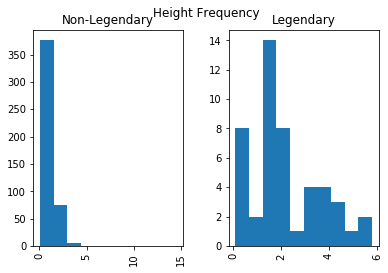

In [38]:
fig, axs = plt.subplots(1, 2)
comb.hist(column='height_m', by='is_legendary', figsize=(15,5), ax=axs);
fig.suptitle('Height Frequency');
axs[0].set_title('Non-Legendary');
axs[1].set_title('Legendary');

<h2 style='color:red'>Legendary pokemons are higher!</h2>

## Weight

In [46]:
# comb['weight_kg'] = comb['weight_kg'].astype(float)

In [47]:
comb['weight_kg'].unique()

array([1.250e+01, 2.970e+01, 2.220e+01, 6.500e+00, 9.500e+00, 3.300e+02,
       1.530e+01, 6.000e+01, 1.050e+01, 5.550e+01, 2.700e+01, 2.200e+02,
       1.420e+01, 3.000e-01, 5.700e+00, 2.050e+01, 1.900e+00, 1.180e+01,
       1.150e+01, 1.505e+02, 7.800e+00, 8.880e+01, 3.400e+00, 6.500e+01,
       3.500e+00,       nan, 3.500e+01, 2.600e+02, 5.960e+01, 1.000e+00,
       2.100e+01, 2.538e+02, 2.030e+01, 1.550e+01, 9.500e+01, 5.000e+00,
       7.500e+01, 1.000e+02, 2.300e+00, 3.400e+02, 1.800e+01, 5.150e+01,
       1.470e+01, 5.050e+01, 3.200e+00, 1.950e+01, 5.900e+00, 4.250e+01,
       5.400e+00, 1.030e+01, 2.360e+01, 1.520e+02, 2.900e+01, 2.380e+01,
       6.200e+01, 1.750e+02, 3.000e+00, 3.280e+01, 5.600e+01, 2.025e+02,
       3.520e+02, 6.000e-01, 4.800e+00, 1.258e+02, 9.000e+00, 5.300e+01,
       3.430e+01, 1.200e+00, 1.960e+01, 7.950e+01, 1.080e+02, 1.100e+00,
       9.900e+00, 1.200e+02, 2.660e+01, 7.000e+00, 1.100e+01, 1.500e+00,
       1.350e+01, 1.500e+01, 6.050e+01, 1.630e+01, 

In [48]:
comb[ comb['weight_kg']==' ' ]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,unique_id,height_m,weight_kg,is_legendary,type_grass,type_steel,type_rock,type_fighting,type_flying,type_normal,...,abil_Oblivious,abil_Gluttony,abil_Drizzle,abil_Psychic_Surge,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6


In [49]:
comb.at[535, 'weight_kg'] = np.nan
comb.at[545, 'weight_kg'] = np.nan

In [50]:
comb['weight_kg'] = comb['weight_kg'].astype(float)

In [51]:
comb.groupby(['is_legendary'])['weight_kg'].describe()

,count,mean,std,min,25%,50%,75%,max
is_legendary,,,,,,,,
0.0,459.0,48.279956,78.176184,0.1,8.55,24.0,57.5,920.0
1.0,47.0,178.255319,204.855688,0.1,49.50,120.0,230.0,999.9


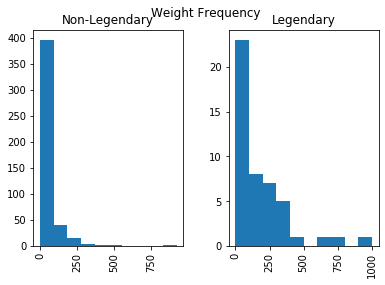

In [52]:
fig, axs = plt.subplots(1, 2)
comb.hist(column='weight_kg', by='is_legendary', figsize=(15,5), ax=axs);
fig.suptitle('Weight Frequency');
axs[0].set_title('Non-Legendary');
axs[1].set_title('Legendary');

<h2 style='color:red'>Legendary pokemons also weight more!</h2>

## Input missing values grouped by is_legendary

In [53]:
comb[ (comb['height_m'].isna()) & (comb['is_legendary']==1) ][['height_m', 'is_legendary']]

,height_m,is_legendary
437,NaN,1.0


In [54]:
comb.at[437, 'height_m'] = 2.187234
comb['height_m'].fillna(1.059259, inplace=True);

In [55]:
comb[ (comb['weight_kg'].isna()) & (comb['is_legendary']==1) ][['weight_kg', 'is_legendary']]

,weight_kg,is_legendary
437,NaN,1.0


In [56]:
comb.at[437, 'weight_kg'] = 178.255319
comb['weight_kg'].fillna(48.279956, inplace=True);

In [57]:
summary_missing_data(comb)

,Count,Percent
is_legendary,281,0.350811


# Split train/test data and save file

In [58]:
traindata = comb.iloc[:brk,:]
testdata = comb.iloc[brk:,:]
testdata.drop(columns=['is_legendary'], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [59]:
traindata.tail()

,unique_id,height_m,weight_kg,is_legendary,type_grass,type_steel,type_rock,type_fighting,type_flying,type_normal,...,abil_Oblivious,abil_Gluttony,abil_Drizzle,abil_Psychic_Surge,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
515,123,0.6,3.2,0.0,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,80.0,105.0,40.0
516,690,1.4,40.6,0.0,0,0,0,0,0,0,...,1,0,0,0,0.0,50.0,35.0,115.0,95.0,95.0
517,147,1.4,50.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,70.0,65.0,70.0,58.0
518,69,1.1,5.0,0.0,0,0,0,0,0,1,...,0,0,0,0,60.0,0.0,60.0,60.0,60.0,60.0
519,461,2.2,210.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0.0,134.0,95.0,100.0,100.0,80.0


In [60]:
testdata.head()

,unique_id,height_m,weight_kg,type_grass,type_steel,type_rock,type_fighting,type_flying,type_normal,type_electric,...,abil_Oblivious,abil_Gluttony,abil_Drizzle,abil_Psychic_Surge,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
520,602,0.6,8.1,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,55.0,45.0,0.0,63.0
521,756,1.5,38.0,0,0,0,0,1,0,0,...,0,0,0,0,0.0,0.0,95.0,120.0,115.0,80.0
522,191,1.4,61.5,0,0,0,0,0,0,1,...,0,0,0,0,0.0,95.0,105.0,165.0,0.0,45.0
523,16,0.2,0.6,0,0,0,0,0,0,0,...,0,0,0,0,0.0,30.0,50.0,65.0,0.0,45.0
524,718,1.3,31.5,0,0,0,1,0,0,0,...,0,0,0,0,0.0,100.0,85.0,80.0,85.0,100.0


In [61]:
traindata.to_csv('./data/cl_train.csv', index=False)
testdata.to_csv('./data/cl_test.csv', index=False)